In [1]:
# Check the versions of libraries

# Python version
import sys

print('Python: {}'.format(sys.version))


Python: 2.7.18 |Anaconda, Inc.| (default, Apr 23 2020, 17:26:54) [MSC v.1500 64 bit (AMD64)]


In [2]:
# Cleaning our data

import csv
from collections import defaultdict

def return_list(local_disease_data):
    local_disease_list = []
    disease_array = local_disease_data.replace('^','_').split('_')
    counter = 1
    for item in disease_array:
        if counter%2==0:
            local_disease_list.append(item)
        counter = counter + 1
        
    return local_disease_list


with open('../data/dataset_uncleaned_unicode.csv') as csvfile:
    reader = csv.reader(csvfile)
    disease_data=""
    disease_weight = 0
    disease_list = []
    
    symptom_list=[]
    disease_weight_dict = {}
    disease_symptoms_dict=defaultdict(list)

    for row in reader:

        if row[0]!="\xc2\xa0" and row[0]!="":
            # print ("Row 0 : %s" % row[0])
            disease_data = str.encode(row[0]).decode('utf-8')
            
            disease_list = return_list(disease_data)
            disease_weight = str.encode(row[1]).decode('utf-8')

        if row[2]!="\xc2\xa0" and row[2]!="":
            # print("Row 2 : %s" % row[2])
            symptom_list = return_list(str.encode(row[2]).decode('utf-8'))

            for disease in disease_list:
                for symptom in symptom_list:
                    disease_symptoms_dict[disease].append(symptom)
                disease_weight_dict[disease] = disease_weight

print ("Disease & Symptoms %s" % disease_symptoms_dict)
print ("Disease & Weight %s" % disease_weight_dict)


Disease & Symptoms defaultdict(<type 'list'>, {u'influenza': [u'uncoordination', u'fever', u'pleuritic pain', u'snuffle', u'throat sore', u'malaise', u'debilitation', u'symptom aggravating factors', u'chill', u'scleral icterus', u'nasal flaring', u'dysuria', u'lip smacking', u'headache', u'sneeze', u'snore', u'green sputum', u'shortness of breath', u'distress respiratory', u'blackout', u'extreme exhaustion'], u'gastritis': [u'heme positive', u'pain abdominal', u'vomiting', u'disequilibrium', u'nausea', u'intoxication', u'haemorrhage', u'guaiac positive', u'pain', u'decreased body weight', u'sore to touch', u'dizziness'], u'hypercholesterolemia': [u'pain', u'pain chest', u'sweat', u'sweating increased', u'nonsmoker', u'pressure chest', u'syncope', u'numbness', u'chest discomfort', u'shortness of breath', u'st segment depression', u'worry', u't wave inverted', u'bradycardia', u'dyspnea'], u'epilepsy': [u'seizure', u'hypometabolism', u'aura', u'muscle twitch', u'drowsiness', u'tremor', u'

In [3]:

with open("../data/dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for disease,symptoms in disease_symptoms_dict.items():
        for symptom in symptoms:
            # print ("disease : %s" % disease)
            writer.writerow([disease,symptom,disease_weight_dict[disease]])


In [4]:

# pandas
import pandas

print('pandas: {}'.format(pandas.__version__))


pandas: 0.24.2


In [5]:

import pandas as pd

columns = ['Source','Target','Weight']
data = pd.read_csv("../data/dataset_clean.csv",names=columns, encoding ="ISO-8859-1")
data.head()


,Source,Target,Weight
0,influenza,uncoordination,68
1,influenza,fever,68
2,influenza,pleuritic pain,68
3,influenza,snuffle,68
4,influenza,throat sore,68


In [6]:

data.to_csv("../data/titled_dataset_clean.csv",index=False)


In [7]:

symptoms_list = []
disease_list = []

with open("../data/node_table.csv","w") as csvfile:
    writer = csv.writer(csvfile)

    for disease,symptoms in disease_symptoms_dict.items():
        for symptom in symptoms:
            if symptom not in symptoms_list:
                writer.writerow([symptom,symptom,"symptom"])
                symptoms_list.append(symptom)
        if disease not in disease_list:
            writer.writerow([disease,disease,"disease"])
            disease_list.append(disease)

print ("Symptoms List %s" % symptoms_list)
print ("Disease List %s" % disease_list)


Symptoms List [u'uncoordination', u'fever', u'pleuritic pain', u'snuffle', u'throat sore', u'malaise', u'debilitation', u'symptom aggravating factors', u'chill', u'scleral icterus', u'nasal flaring', u'dysuria', u'lip smacking', u'headache', u'sneeze', u'snore', u'green sputum', u'shortness of breath', u'distress respiratory', u'blackout', u'extreme exhaustion', u'heme positive', u'pain abdominal', u'vomiting', u'disequilibrium', u'nausea', u'intoxication', u'haemorrhage', u'guaiac positive', u'pain', u'decreased body weight', u'sore to touch', u'dizziness', u'pain chest', u'sweat', u'sweating increased', u'nonsmoker', u'pressure chest', u'syncope', u'numbness', u'chest discomfort', u'st segment depression', u'worry', u't wave inverted', u'bradycardia', u'dyspnea', u'seizure', u'hypometabolism', u'aura', u'muscle twitch', u'drowsiness', u'tremor', u'unresponsiveness', u'hemiplegia', u'myoclonus', u'gurgle', u'sleepy', u'lethargy', u'wheelchair bound', u'hyperkalemia', u'orthopnea', u'r

In [8]:

nt_columns = ['Id','Label','Attribute']
nt_data = pd.read_csv("../data/node_table.csv",names=nt_columns, encoding ="ISO-8859-1",)
nt_data.head()


,Id,Label,Attribute
0,uncoordination,uncoordination,symptom
1,fever,fever,symptom
2,pleuritic pain,pleuritic pain,symptom
3,snuffle,snuffle,symptom
4,throat sore,throat sore,symptom


In [9]:

nt_data.to_csv("../data/titled_node_table.csv",index=False)


In [10]:

print("Source Items : %s" % len(data['Source'].unique()))
print("Target Items : %s" % len(data['Target'].unique()))


Source Items : 149
Target Items : 410


In [11]:

data_frame = pd.DataFrame(data)
target_data_frame = pd.get_dummies(data_frame.Target)
target_data_frame.head()


,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:

data_frame.head()
source_data_frame = data_frame['Source']
source_data_frame.head()


0    influenza
1    influenza
2    influenza
3    influenza
4    influenza
Name: Source, dtype: object

In [13]:
disease_symptoms_data_frame = pd.concat([source_data_frame,target_data_frame], axis=1)
disease_symptoms_data_frame.drop_duplicates(keep='first',inplace=True)
disease_symptoms_data_frame[:5]


,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,influenza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,influenza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,influenza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,influenza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,influenza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:

print("Count of Rows : %s" % len(disease_symptoms_data_frame))

columns = disease_symptoms_data_frame.columns
columns = columns[1:]
disease_symptoms_data_frame = disease_symptoms_data_frame.groupby('Source').sum()
disease_symptoms_data_frame = disease_symptoms_data_frame.reset_index()
disease_symptoms_data_frame[:5]


Count of Rows : 2119


,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pneumocystis carinii pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accident cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquired immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:

print("Count of Rows : %s" % len(disease_symptoms_data_frame))

disease_symptoms_data_frame.to_csv("../data/attributed_dataset_clean.csv",index=False)


Count of Rows : 149


In [16]:

# seaborn
# import seaborn
# 
# print('seaborn: {}'.format(seaborn.__version__))


In [17]:

# matplotlib
# import matplotlib
# 
# print('matplotlib: {}'.format(matplotlib.__version__))


In [18]:

# sklearn
import sklearn

print('sklearn: {}'.format(sklearn.__version__))


sklearn: 0.17.1


In [19]:

# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

x = disease_symptoms_data_frame[columns]
y = disease_symptoms_data_frame['Source']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)
mnb.score(x_test, y_test)


0.0

In [20]:
# Inferences on train and test split
# It can't work on unseen data because it has never seen that disease before. Also, there is only one point for each disease and hence no point for this. So we need to train the model entirely. Then what will we test it on? Missing data? Say given one symptom what is the disease? This is again multilabel classification. We can work symptom on symptom. What exactly is differential diagnosis, we need to replicate that.

mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)
mnb_tot.score(x, y)

disease_predicted = mnb_tot.predict(x)
disease_real = y.values

for i in range(0, len(disease_real)):
    if disease_predicted[i]!=disease_real[i]:
        print ('Prediction : {0} Actual :{1}'.format(disease_predicted[i], disease_real[i]))

# These are the predicted versus actual diseases that our classifier misclassifies.


Prediction : HIV Actual :acquired immuno-deficiency syndrome
Prediction : biliary calculus Actual :cholelithiasis
Prediction : coronary arteriosclerosis Actual :coronary heart disease
Prediction : depression mental Actual :depressive disorder
Prediction : HIV Actual :hiv infections
Prediction : carcinoma breast Actual :malignant neoplasm of breast
Prediction : carcinoma of lung Actual :malignant neoplasm of lung
Prediction : carcinoma prostate Actual :malignant neoplasm of prostate
Prediction : carcinoma colon Actual :malignant tumor of colon
Prediction : candidiasis Actual :oralcandidiasis
Prediction : effusion pericardial Actual :pericardial effusion body substance
Prediction : sepsis (invertebrate) Actual :septicemia
Prediction : sepsis (invertebrate) Actual :systemic infection
Prediction : tonic-clonic epilepsy Actual :tonic-clonic seizures


In [21]:
# Training a decision tree

from sklearn.tree import DecisionTreeClassifier

print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Accuracy : ", clf_dt.score(x,y))


DecisionTree
('Accuracy : ', 0.9060402684563759)


In [22]:

from sklearn.tree import export_graphviz

export_graphviz(dt, out_file='../graph_files/tree.gv', feature_names=columns)


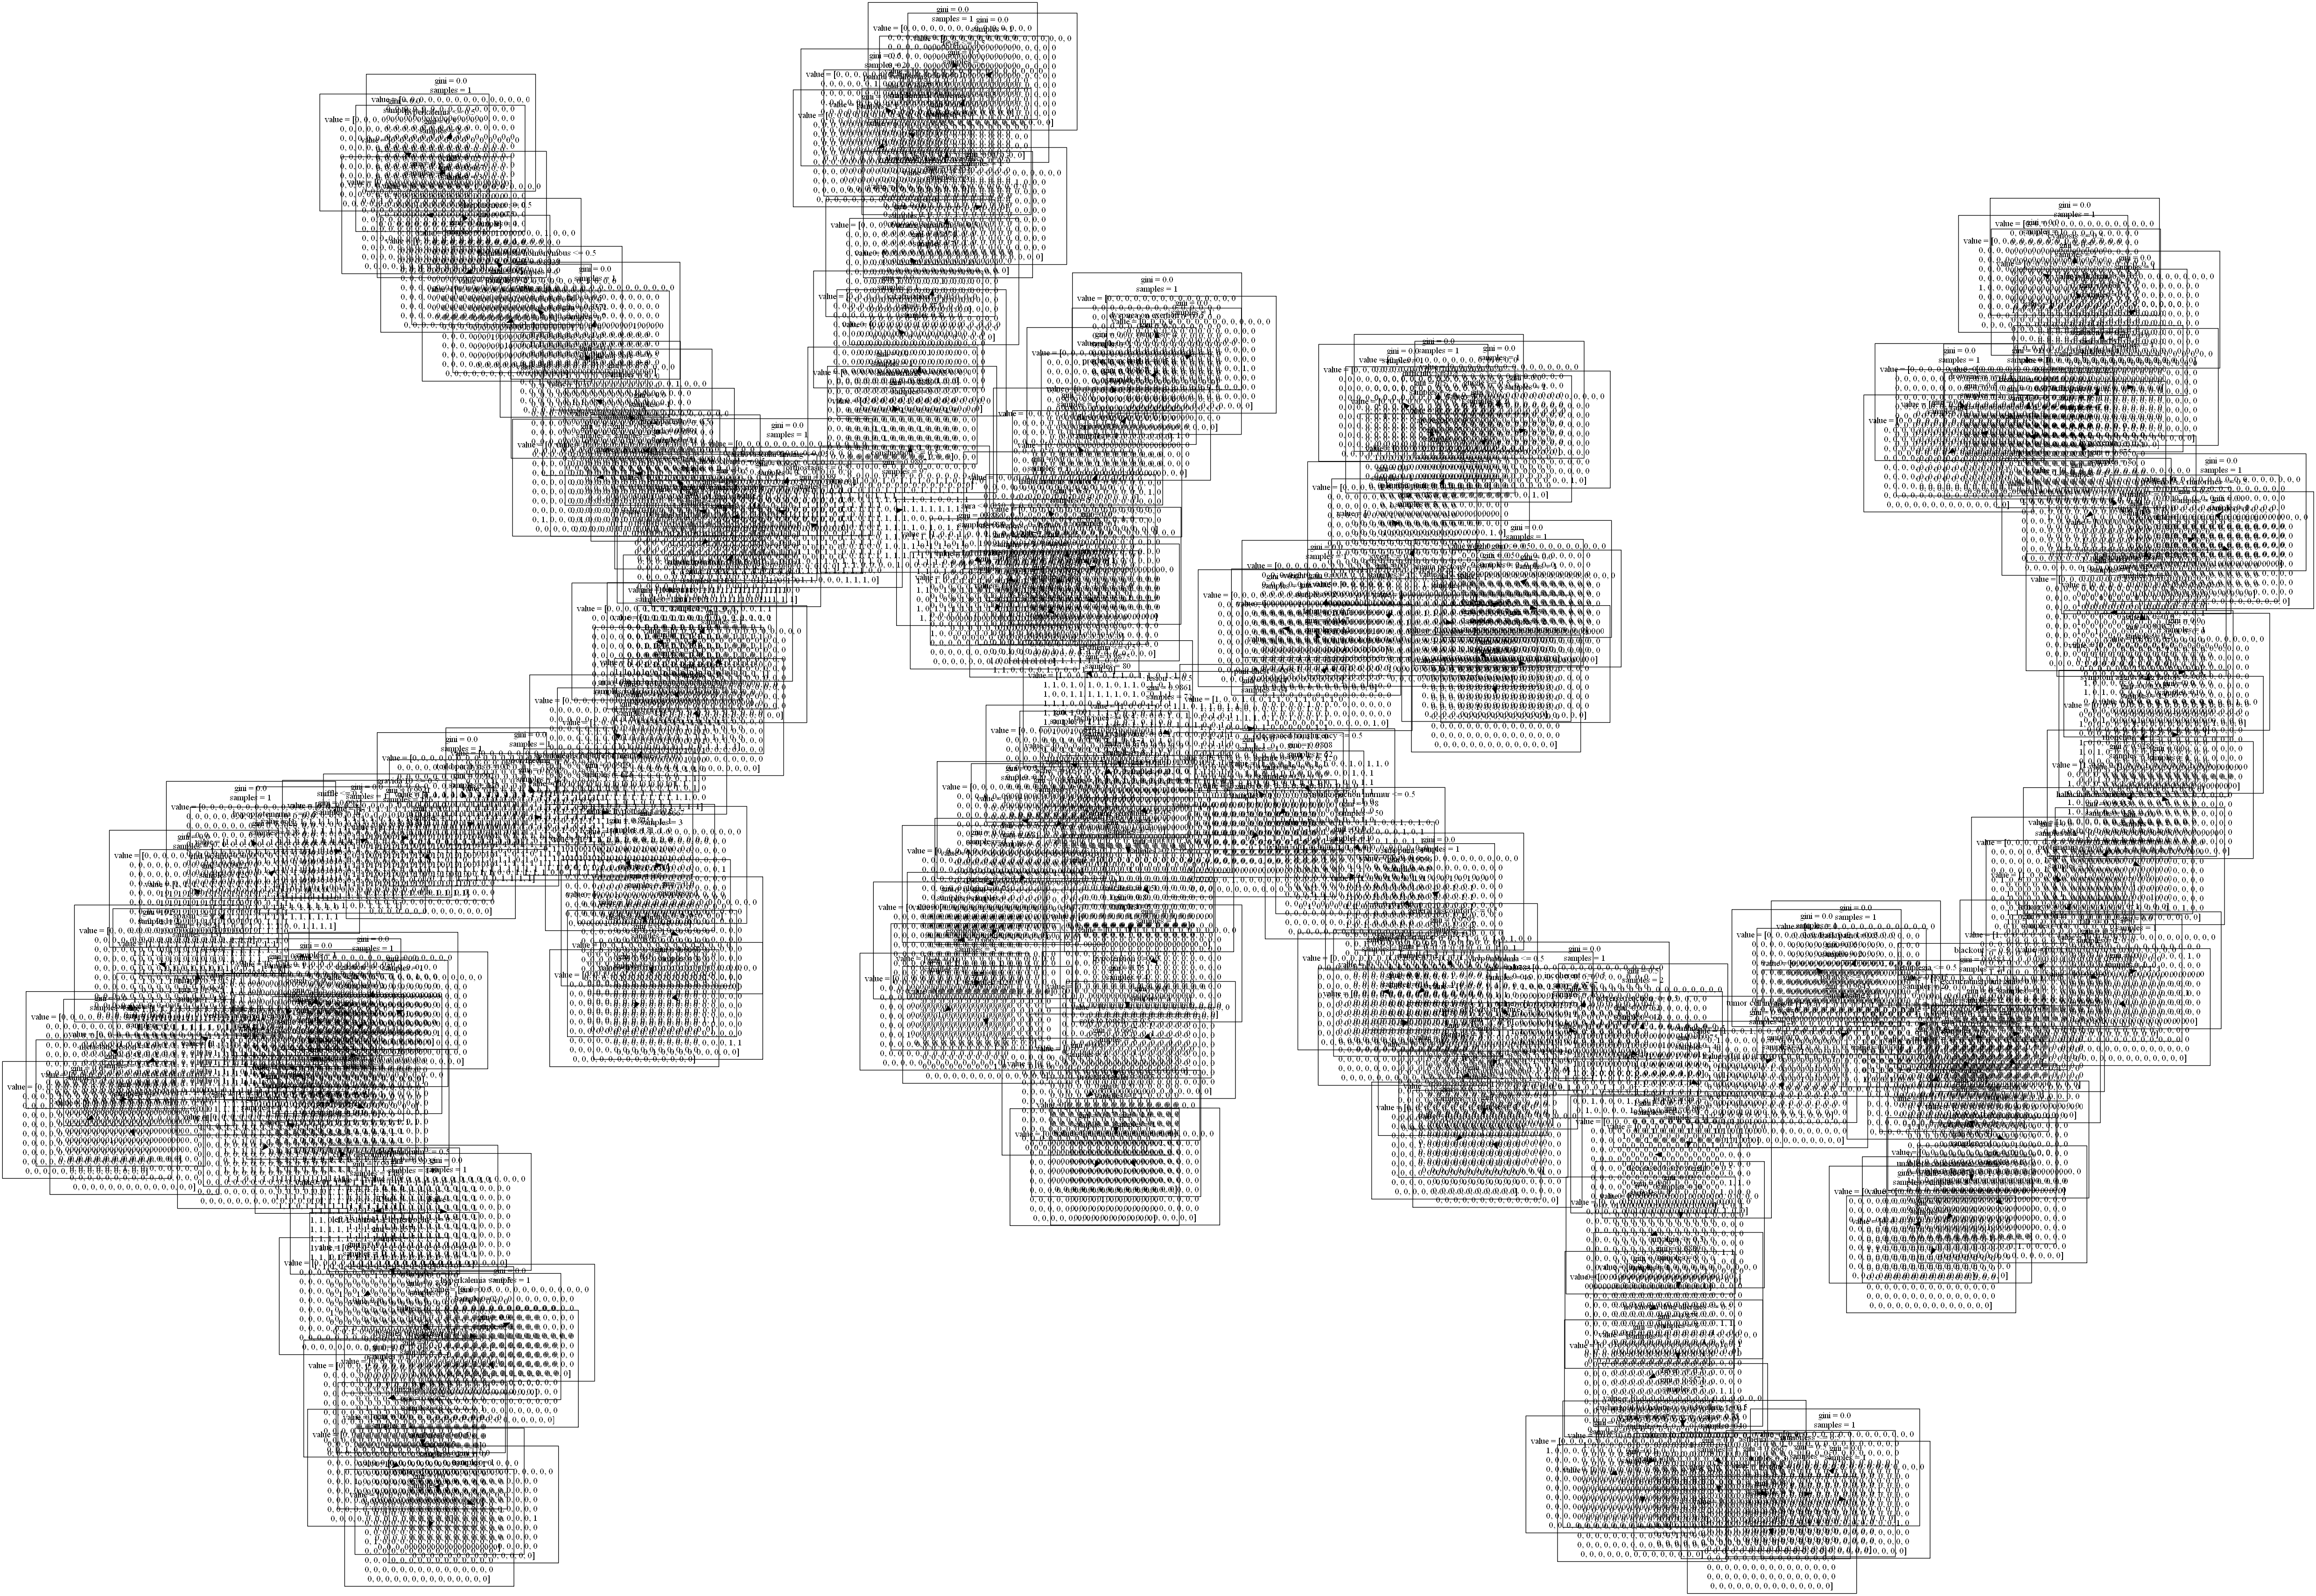

In [23]:
# export graph file
# "C:\Program Files (x86)\Graphviz2.38\bin\sfdp.exe" -x -Tpng tree.gv >  tree.png
from IPython.display import Image
Image(filename='../graph_files/tree.png')

# According to the plotted decision tree, Jugular venous distention is the attribute symptom that has the highest gini score of 0.9846. Thus this symptom would play a major role in predicting diseases.


In [24]:
features = columns
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i


In [25]:
# Predicting the disease where the symptom are wheezing, cough, shortness of breath, chest tightness, non-productive cough, pleuritic pain, productive cough, symptom aggravating factors,distress respiratory

import numpy as np

sample_x = [1 if i ==feature_dict['wheezing'] or i==feature_dict['cough'] or i==feature_dict['shortness of breath'] or i==feature_dict['chest tightness'] or i==feature_dict['non-productive cough'] or i==feature_dict['pleuritic pain'] or i==feature_dict['productive cough'] or i==feature_dict['symptom aggravating factors'] or i==feature_dict['distress respiratory'] else 0 for i in range(len(features))]
print("Length of Sample : %s" % len(sample_x))
sample_x1 = np.array(sample_x).reshape(1,len(sample_x))
print("Predicted Disease : %s" % dt.predict(sample_x1))
# print("Predicted Disease Probability : %s" % dt.predict_proba(sample_x))
    

Length of Sample : 409
Predicted Disease : [u'asthma']


In [26]:
# Predicting the disease where the symptom are pain, mass of body structure, lesion, cushingoid facies, cushingoid habitus, emphysematous change, decreased body weight, ascites, hoarseness, thicken, hematuria

import numpy as np

sample_x = [1 if i ==feature_dict['pain'] or i==feature_dict['mass of body structure'] or i==feature_dict['lesion'] or i==feature_dict['cushingoid facies'] or i==feature_dict['cushingoid habitus'] or i==feature_dict['emphysematous change'] or i==feature_dict['decreased body weight'] or i==feature_dict['ascites'] or i==feature_dict['hoarseness'] or i==feature_dict['thicken'] or i==feature_dict['hematuria'] else 0 for i in range(len(features))]
print("Length of Sample : %s" % len(sample_x))
sample_x2 = np.array(sample_x).reshape(1,len(sample_x))
print("Predicted Disease : %s" % dt.predict(sample_x2))
# print("Predicted Disease Probability : %s" % dt.predict_proba(sample_x))
    

Length of Sample : 409
Predicted Disease : [u'primary malignant neoplasm']


In [27]:
# Predicting the disease where the symptom are pain, mass of body structure, lesion, cushingoid facies, emphysematous change, decreased body weight, ascites, hoarseness, thicken, hematuria

import numpy as np

sample_x = [1 if i ==feature_dict['pain'] or i==feature_dict['mass of body structure'] or i==feature_dict['lesion'] or i==feature_dict['cushingoid facies'] or i==feature_dict['emphysematous change'] or i==feature_dict['decreased body weight'] or i==feature_dict['ascites'] or i==feature_dict['hoarseness'] or i==feature_dict['thicken'] or i==feature_dict['hematuria'] else 0 for i in range(len(features))]
print("Length of Sample : %s" % len(sample_x))
sample_x3 = np.array(sample_x).reshape(1,len(sample_x))
print("Predicted Disease : %s" % dt.predict(sample_x3))
# print("Predicted Disease Probability : %s" % dt.predict_proba(sample_x))


Length of Sample : 409
Predicted Disease : [u'degenerative polyarthritis']


In [28]:
# Predicting the disease where the symptom are pain, mass of body structure, lesion, cushingoid facies, cushingoid habitus, emphysematous change

import numpy as np

sample_x = [1 if i ==feature_dict['pain'] or i==feature_dict['mass of body structure'] or i==feature_dict['lesion'] or i==feature_dict['cushingoid facies'] or i==feature_dict['cushingoid habitus'] or i==feature_dict['emphysematous change'] else 0 for i in range(len(features))]
print("Length of Sample : %s" % len(sample_x))
sample_x4 = np.array(sample_x).reshape(1,len(sample_x))
print("Predicted Disease : %s" % dt.predict(sample_x4))
# print("Predicted Disease Probability : %s" % dt.predict_proba(sample_x))


Length of Sample : 409
Predicted Disease : [u'primary malignant neoplasm']


In [29]:
# Predicting the disease where the symptom are pain, lesion, cushingoid habitus, decreased body weight, hoarseness, hematuria

import numpy as np

sample_x = [1 if i ==feature_dict['pain'] or i==feature_dict['lesion'] or i==feature_dict['cushingoid habitus'] or i==feature_dict['decreased body weight'] or i==feature_dict['hoarseness'] or i==feature_dict['hematuria'] else 0 for i in range(len(features))]
print("Length of Sample : %s" % len(sample_x))
sample_x5 = np.array(sample_x).reshape(1,len(sample_x))
print("Predicted Disease : %s" % dt.predict(sample_x5))
# print("Predicted Disease Probability : %s" % dt.predict_proba(sample_x))


Length of Sample : 409
Predicted Disease : [u'primary malignant neoplasm']


In [41]:
# Predicting the disease where the only symptom is headache.

import numpy as np

sample_x = [1 if i ==feature_dict['headache'] else 0 for i in range(len(features))]
print("Length of Sample : %s" % len(sample_x))
sample_x6 = np.array(sample_x).reshape(1,len(sample_x))
print("Predicted Disease : %s" % dt.predict(sample_x6))
# print("Predicted Disease Probability : %s" % dt.predict_proba(sample_x))

# The prediction would improve once we take more symptoms as input.


Length of Sample : 409
Predicted Disease : [u'Pneumocystis carinii pneumonia']


In [42]:
# save the model to disk

import pickle

pickle.dump(clf_dt, open('../models/Disease_Symptom_Knowledge_Database_pickle_model.sav', 'wb'))


In [44]:

# load the model from disk
loaded_model = pickle.load(open('../models/Disease_Symptom_Knowledge_Database_pickle_model.sav', 'rb'))
# print("X1 Predicted Disease : %s" % loaded_model.predict(sample_x1))
print("X2 Predicted Disease : %s" % loaded_model.predict(sample_x2))
print("X3 Predicted Disease : %s" % loaded_model.predict(sample_x3))
print("X4 Predicted Disease : %s" % loaded_model.predict(sample_x4))
print("X5 Predicted Disease : %s" % loaded_model.predict(sample_x5))
print("X6 Predicted Disease : %s" % loaded_model.predict(sample_x6))


X2 Predicted Disease : [u'primary malignant neoplasm']
X3 Predicted Disease : [u'degenerative polyarthritis']
X4 Predicted Disease : [u'primary malignant neoplasm']
X5 Predicted Disease : [u'primary malignant neoplasm']
X6 Predicted Disease : [u'Pneumocystis carinii pneumonia']


In [46]:

import sys
import os
sys.path.append(os.path.relpath('../'))
import disease_prediction_api

# print("X1 Predicted Disease : %s" % api.get_disease(sample_x1))
print("X2 Predicted Disease : %s" % disease_prediction_api.get_disease(sample_x2))
print("X3 Predicted Disease : %s" % disease_prediction_api.get_disease(sample_x3))
print("X4 Predicted Disease : %s" % disease_prediction_api.get_disease(sample_x4))
print("X5 Predicted Disease : %s" % disease_prediction_api.get_disease(sample_x5))
print("X6 Predicted Disease : %s" % disease_prediction_api.get_disease(sample_x6))


IOError: [Errno 2] No such file or directory: 'models/Disease_Symptom_Knowledge_Database_pickle_model.sav'

In [119]:

import json

print("Exporting Features as JSON...")
with open('../data/features.json', 'w') as outfile:
    json.dump(feature_dict, outfile)
    
with open('../data/features.json') as json_file:
    features_json = json.load(json_file)
print("Features (From JSON) are ...")
print(features_json)


Exporting Features as JSON...
Features (From JSON) are ...
{u'retch': 312, u'alcohol binge episode': 17, u'suicidal': 353, u'hyperhidrosis disorder': 175, u'sinus rhythm': 330, u'asymptomatic': 29, u'feces in rectum': 117, u'muscle hypotonia': 228, u'extrapyramidal sign': 109, u'nervousness': 239, u"Heberden's node": 0, u'cardiomegaly': 51, u'homicidal thoughts': 168, u'tonic seizures': 373, u'vision blurred': 394, u'nausea': 235, u'incoherent': 196, u'aphagia': 23, u'intermenstrual heavy bleeding': 198, u'urge incontinence': 387, u'general unsteadiness': 136, u'no known drug allergies': 242, u'stinging sensation': 348, u'sedentary': 324, u'painful swallowing': 261, u'cardiovascular event': 52, u'weepiness': 396, u'para 1': 266, u'para 2': 267, u'tired': 370, u'abortion': 8, u'drool': 89, u'verbally abusive behavior': 392, u'unable to concentrate': 379, u'catatonia': 54, u'sciatica': 321, u'paralyse': 268, u'fremitus': 131, u'proteinemia': 297, u'dysdiadochokinesia': 93, u'sore to touc